In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Problem \# 2

Consider $d$ points $t_1,...,t_f$ on the interval $[0,1]$ given by

$$t_i=\frac{i-1}{d}\quad i \in  \{1,...,d\}$$

You can think pf these points as $N$ instants between 0 and 1. Consider also the monomials

$$P_j(t)=t^j$$

For example, $P_0(t)\equiv 1, P_1(t)=t, P_2(t)=t^2$, etc. Finally, consider the collection of vectore $\pmb p_0,....,\pmb p_n$ in $\mathbb{R}^d$ defined as

$$\pmb{p}_j = \begin{bmatrix}P_j(t_1)\\ \vdots \\ P_j(t_d)\end{bmatrix}=\begin{bmatrix}t_1^j \\ \vdots \\ t_d^j\end{bmatrix}$$

In other words, the first component of $\pmb p_j$ is the plynomial $P_j$ evaluated $t_1$, the second component is $P_j$ evaluated at $t_2$, etc.

#### (b) Let $d=100$ and $n=2$. Using matplotlib plot any linear combination of $\pmb{p}_0,\pmb {p}_1, \pmb{p}_2$  you want, indicating the scalars you used. What kind of plynomials do you get by taking linear combinations of $\pmb{p}_0,\pmb{p}_1,\pmb{p}_2$ (e.g constant, linear,etc)? Can you generalize this idea when $n>2$?

In [2]:
def create_p(n,d):
    aux1=[]
    for i in np.arange(0,n+1):
        aux2=[]
        for j  in np.arange(1,d+1):
                if i!=0:
                    aux2.append(((j-1)/d)**i)
                else :
                    aux2.append(1)
        aux1.append(aux2)
    return aux1

In [3]:
p0,p1,p2=create_p(2,100)

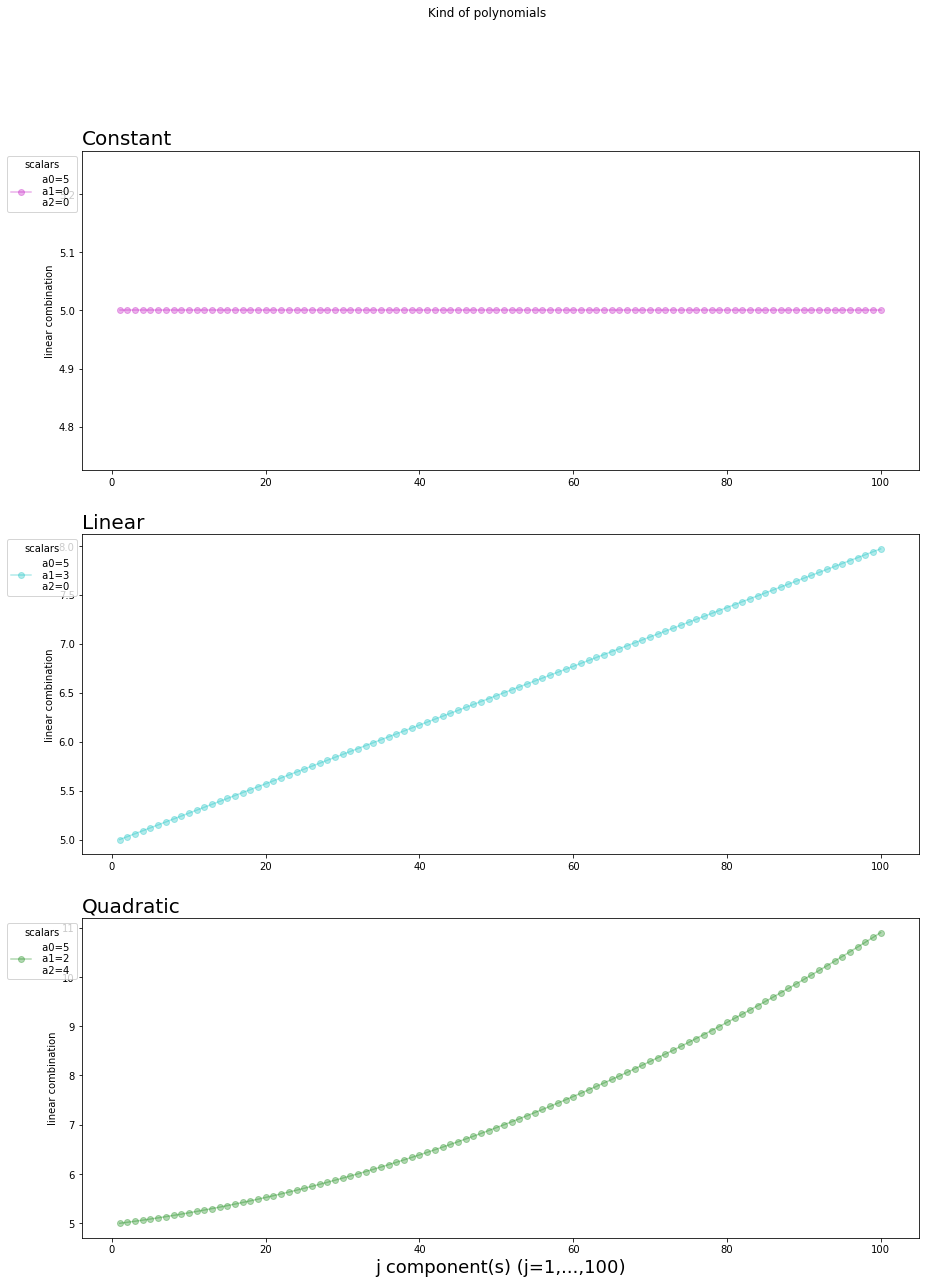

In [4]:
x = np.arange(1,101)

y0 = 5*np.array(p0)+0*np.array(p1)+0*np.array(p2)
y1 = 5*np.array(p0)+3*np.array(p1)+0*np.array(p2)
y2 = 5*np.array(p0)+2*np.array(p1)+4*np.array(p2)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1,figsize=(15,20))
fig.suptitle('Kind of polynomials')

ax1.plot(x, y0, 'o-',c='m',alpha=0.3,label=' a0=5 \n a1=0 \n a2=0')
ax1.set_title('Constant',loc='left',fontsize=20)
ax1.set_ylabel('linear combination')
ax1.legend(loc="upper right", bbox_to_anchor=[0, 1],title="scalars",fancybox=True)

ax2.plot(x, y1, 'o-',c='c',alpha=0.3,label=' a0=5 \n a1=3 \n a2=0')
ax2.set_title('Linear',loc='left',fontsize=20)
ax2.set_ylabel('linear combination')
ax2.legend(loc="upper right", bbox_to_anchor=[0, 1],title="scalars",fancybox=True)

ax3.plot(x, y2, 'o-',c='g',alpha=0.3,label=' a0=5 \n a1=2 \n a2=4')
ax3.set_title('Quadratic',loc='left',fontsize=20)
ax3.set_ylabel('linear combination')
ax3.set_xlabel('j component(s) (j=1,...,100)',fontsize=18)
ax3.legend(loc="upper right", bbox_to_anchor=[0, 1],title="scalars",fancybox=True)
plt.show()

#### (c) Let $d=4$ and $n=3$.Define the vector $$\pmb f=\begin{bmatrix}\cos(2\pi t_1)\\\cos(2\pi t_2)\\ \cos(2\pi t_3)\\ \cos(2\pi t_4)\end{bmatrix}$$  Using numpy find scalars $\alpha_0,...,\alpha_3$ such that $$\alpha_0\pmb{p}_0+\dots+\alpha_3\pmb p_3=\pmb f$$. Furhtermore, if $\alpha_0,\dots,\alpha_3$ are the scalars you found, using matplotlib plt the functions $$Q(t)=\alpha_0+\alpha_1 t+\alpha_2t^2+\alpha_3t^3 \text{ and } f(t)=cos(2\pi t)$$ on the same figure. What can you say about $Q$ and $f$? 

In [5]:
p=create_p(3,4)
f=[1,0,-1,0]

    
#solve
alpha=np.linalg.solve(np.array(p).T,np.array(f))
print('The scalars alpha are :', alpha)

The scalars alpha are : [  1.          -1.33333333 -16.          21.33333333]


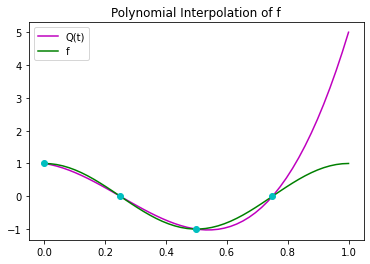

In [6]:
x=np.linspace(0,1)
t=[0,0.25,0.5,0.75]
plt.plot(x,alpha[0]+alpha[1]*x+alpha[2]*(x**2)+alpha[3]*(x**3),c='m',label='Q(t)')
plt.plot(x,np.cos(2*np.pi*x),c='g',label='f')
plt.plot(t,[np.cos(2*np.pi*t[0]),np.cos(2*np.pi*t[1]),np.cos(2*np.pi*t[2]),np.cos(2*np.pi*t[3])],'ro',c='c')
plt.legend()
plt.title('Polynomial Interpolation of f')
plt.show()

#### (e) Repeat (c) for d=6 and n=5. Is the polynomial Q closer to f?

In [7]:
f=[]
for i in np.arange(1,7):
    f.append(np.cos(2*np.pi*(i-1)/6))
p=create_p(5,6)

#solve
alpha=np.linalg.solve(np.array(p).T,np.array(f))
print('The scalars alpha are :', alpha)

The scalars alpha are : [  1.     0.65 -27.75  31.5   27.   -32.4 ]


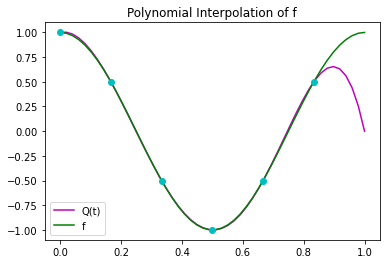

In [8]:
x=np.linspace(0,1)
t=[]
for i in np.arange(1,7):
    t.append((i-1)/6)
plt.plot(x,alpha[0]+alpha[1]*x+alpha[2]*(x**2)+alpha[3]*(x**3)+alpha[4]*(x**4)+alpha[5]*(x**5),c='m',label='Q(t)')
plt.plot(x,np.cos(2*np.pi*x),c='g',label='f')
plt.plot(t,[np.cos(2*np.pi*t[0]),np.cos(2*np.pi*t[1]),np.cos(2*np.pi*t[2]),np.cos(2*np.pi*t[3]),np.cos(2*np.pi*t[4]),np.cos(2*np.pi*t[5])],'ro',c='c')
plt.legend()
plt.title('Polynomial Interpolation of f')
plt.show()

## Problem \# 3

In this question we will be using Python to solve a mystery. In the code Example.py that you can
download from the course website, we have the systems BlackBox1 and BlackBox2. Both represent an
encryption system to be cracked. In the context of this question, that means that each system receives a message, called plaintext, represented by a vector of positive integers $\pmb{\alpha}\in \mathbb{Z}_+^n$ and outputs an encrypted message $\pmb y\in\mathbb{Z}_+^n$. The encryption procedure is represented by a linear combination with some collection of keys $\pmb{x}_1, . . . , \pmb{x}_n \in \mathbb{R}^n$.

$$\pmb{y}=\sum_{i=1}^n \alpha_i \pmb{x}_i$$

Each black box has a different collection of keys $\pmb{x}_1, . . . , \pmb{x}_n$.



#### (a) Create a function str2num that transform a string to an array of numbers. Also, create another function num2str that does the opposite. Follow the rules of the dictionary in Table 1.

In [9]:
#create order arrays of numbers and letters
numbers=np.arange(1,27)
numbers
letters=[]
for i in range(97, 123):
    letters.append('{:c}'.format(i))
np.array(letters)

array(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm',
       'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z'],
      dtype='<U1')

In [10]:
def str2num(string):
    aux=[]
    for i in string.lower():
        aux.append(numbers[letters.index(i)])
    return np.array(aux)

def num2str(num):
    string=''
    for i in num:
        string+=letters[int(i)-1]
    return string

#### (b) Find a method to “crack” the keys $\pmb x_1, . . . , \pmb x_n \in \mathbb{R}^m$ of BlackBox1 by sending a series of messages $\pmb{α}_k$. Remember, you can not send a zero as it is not present in the dictionary of Table 1. Which is the minimum amount of messages k necessary to obtain the keys? What is the message hidden in the keys?

In [11]:
from BlackBox import BlackBox1, BlackBox2
from numpy import array
a1 = array([2,2,2,2,2])
a2 = array([1,2,2,2,2])
a3 = array([2,1,2,2,2])
a4 = array([2,2,1,2,2])
a5 = array([2,2,2,1,2])
a6 = array([2,2,2,2,1])
#message to be encryoted
x1 = BlackBox1().encrypt(a1) -BlackBox1().encrypt(a2)
x2 = BlackBox1().encrypt(a1) -BlackBox1().encrypt(a3)
x3 = BlackBox1().encrypt(a1) -BlackBox1().encrypt(a4)
x4 = BlackBox1().encrypt(a1) -BlackBox1().encrypt(a5)
x5 = BlackBox1().encrypt(a1) -BlackBox1().encrypt(a6)
print(x1)
print(x2)
print(x3)
print(x4)
print(x5)

print(num2str(x1))
print(num2str(x2))
print(num2str(x3))
print(num2str(x4))
print(num2str(x5))

[ 9  2 13 13  1]
[20  8  5 13  1]
[20  9  3  1 12]
[13  5 20  8 15]
[ 4 19 15 14  5]
ibmma
thema
tical
metho
dsone


#### c) You have received the following mysterious message after passing through BlackBox1 $$\pmb{y}=[1186 \quad487\quad 866\quad 573 \quad732]^t$$

#### Which was the original message?

In [12]:
A=array([x1,x2,x3,x4,x5]).T
b=array([1186,487,866,573,732])
message=np.linalg.solve(A,b).round().astype('int64')
print(num2str(message))

pizza


#### d) Repeat question (b) but for BlackBox2. Is it possible to find the keys in this case? Justify your answer. Independent of the previous answer try to decipher the following encrypted message $$\pmb y=[295 \quad 331\quad 627\quad 368]^t$$

In [13]:
b1 = array([2,2,2,2])
b2 = array([1,2,2,2])
b3 = array([2,1,2,2])
b4 = array([2,2,1,2])
b5 = array([2,2,2,1])

y1 = BlackBox2().encrypt(b1) -BlackBox2().encrypt(b2)
y2 = BlackBox2().encrypt(b1) -BlackBox2().encrypt(b3)
y3 = BlackBox2().encrypt(b1) -BlackBox2().encrypt(b4)
y4 = BlackBox2().encrypt(b1) -BlackBox2().encrypt(b5)

print(y1)
print(y2)
print(y3)
print(y4)

print(num2str(y1))
print(num2str(y2))
print(num2str(y3))
print(num2str(y4))

[13  1 20  8]
[19  1 18  5]
[ 3 15 15 12]
[ 3 15 15 12]
math
sare
cool
cool
